<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>Алгоритмы кластеризации (практика)</center></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

try:
    from ipywidgets import interact, IntSlider, fixed, FloatSlider
except ImportError:
    print u'Так надо'

[Данные](https://cloud.mail.ru/public/GeB1/w8nWkQyd1)

# Пищевая ценность продуктов

Загрузите файл `food.txt`. В нем содержится информация о пищевой ценности разных продуктов

* Подготовте данные к кластеризации и сделайте иерарническую кластеризацию этого набора данных.
* Изобразите дендрограмму
* Выверите число кластеров и интерпретируйте их

Почему перед применением кластеризации признки необходимо нормализовать?

In [3]:
## Your Code Here
df = pd.read_csv('food.txt', sep=' ')
df.head()

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7


In [14]:
X = df.iloc[:, 1:].values
X = df.loc[:, ['Energy', 'Protein', 'Fat', 'Calcium', 'Iron']].values

In [17]:
X_train = (X-X.mean(axis=0))/X.std(axis=0)

In [25]:
X_train.mean(axis=0)

array([ -9.45745539e-17,   0.00000000e+00,   6.57909941e-17,
         3.70074342e-17,   1.38777878e-16])

In [26]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [39]:
Z = linkage(X_train, method='complete', metric='euclidean')

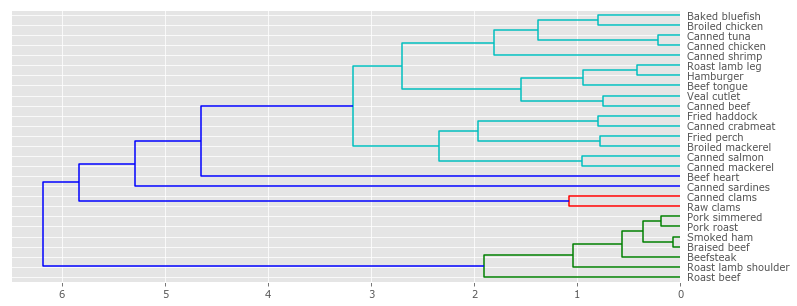

In [40]:
dend = dendrogram(Z, labels=df.Name.values, orientation='left')

In [41]:
labels = fcluster(Z, 4, criterion='distance')
labels

array([1, 3, 1, 1, 3, 3, 3, 4, 3, 1, 1, 1, 1, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3,
       3, 5, 3, 3], dtype=int32)

In [42]:
df.loc[:, 'label'] = labels

In [34]:
df.head()

,Name,Energy,Protein,Fat,Calcium,Iron,label
0,Braised beef,340,20,28,9,2.6,1
1,Hamburger,245,21,17,9,2.7,3
2,Roast beef,420,15,39,7,2.0,1
3,Beefsteak,375,19,32,9,2.6,1
4,Canned beef,180,22,10,17,3.7,3


In [35]:
df.groupby('label').agg('mean')

,Energy,Protein,Fat,Calcium,Iron
label,,,,,
1,352.857143,18.571429,30.142857,8.714286,2.414286
2,57.500000,9.000000,1.000000,78.000000,5.700000
3,167.187500,19.812500,8.562500,36.812500,1.725000
4,160.000000,26.000000,5.000000,14.000000,5.900000
5,180.000000,22.000000,9.000000,367.000000,2.500000


In [36]:
for label, group in df.groupby('label'):
    print('Cluster label = {}'.format(label))
    print('='*10)
    
    print(group)

Cluster label = 1
                   Name  Energy  Protein  Fat  Calcium  Iron  label
0          Braised beef     340       20   28        9   2.6      1
2            Roast beef     420       15   39        7   2.0      1
3             Beefsteak     375       19   32        9   2.6      1
9   Roast lamb shoulder     300       18   25        9   2.3      1
10           Smoked ham     340       20   28        9   2.5      1
11           Pork roast     340       19   29        9   2.5      1
12        Pork simmered     355       19   30        9   2.4      1
Cluster label = 2
            Name  Energy  Protein  Fat  Calcium  Iron  label
16     Raw clams      70       11    1       82   6.0      2
17  Canned clams      45        7    1       74   5.4      2
Cluster label = 3
                Name  Energy  Protein  Fat  Calcium  Iron  label
1          Hamburger     245       21   17        9   2.7      3
4        Canned beef     180       22   10       17   3.7      3
5    Broiled chicken    

# Европейcкие языки

Загризите данные из файла `'languages.txt'` о произношении различных слов на европейских языках.

Используйте расстояние Левенштейна, чтобы рассчитать близость языков по данным словам

Для этого вам надо написать собственную функцию, которая принимает на вход вектора двух объектов и считает расстояние между ними.

Как в дальнейшем использовать вашу функцию можно посмотреть [здесь](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.pdist.html) в п.23 (если вы будете использовать `scipy`)  или передать на вход в `AgglomerativeClustering` в `sklearn`.

In [ ]:
def classic_levenshtein(string_1, string_2):
    '''
    Расстояние Левенштейна
    '''
    len_1 = len(string_1)
    len_2 = len(string_2)
    cost = 0

    if len_1 and len_2 and string_1[0] != string_2[0]:
        cost = 1

    if len_1 == 0:
        return len_2
    elif len_2 == 0:
        return len_1
    else:
        return min(
            classic_levenshtein(string_1[1:], string_2) + 1,
            classic_levenshtein(string_1, string_2[1:]) + 1,
            classic_levenshtein(string_1[1:], string_2[1:]) + cost,
)

In [ ]:
classic_levenshtein('мгу', 'вмк')

In [ ]:
## Your Code Here

## DBSCAN и геоданные

Загрузите геоданные из `geo_data.txt.gz` (uid, timestamp, lat, lon, location_id).

Будем пытаться кластеризовать данные с помощью DBSCAN и меры [haversine](https://en.wikipedia.org/wiki/Haversine_formula)

In [44]:
# import mpl_toolkits.basemap as bm
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [59]:
df_geo = pd.read_csv('geo_data.txt', sep='\t', header=None,
                     names=['lat', 'lon'])/10000

In [60]:
df_geo.head()

,lat,lon
0,62.5983,29.7439
1,62.6146,29.7440
2,62.6144,29.7456
3,62.6004,29.7394
4,62.6018,29.7437


In [61]:
def plot_geo(lat, lon, labels=None):    
    try:
        lllat, lllon = lat.min()-1, lon.max()+1
        urlat, urlon = lat.max()+1, lon.min()-1

        plt.figure(figsize=(10, 10))

        m = bm.Basemap(
            llcrnrlon=lllon,
            llcrnrlat=lllat,
            urcrnrlon=urlon,
            urcrnrlat=urlat, 
            projection='merc',
            resolution='h'
        )

        m.drawcoastlines(linewidth=0.5)
        m.drawmapboundary(fill_color='#47A4C9', zorder=1)
        m.fillcontinents(color='#EBC4D8',lake_color='#47A4C9', zorder=2)

        parallels = np.linspace(lllat, urlat, 10)
        m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
        # draw meridians
        meridians = np.linspace(urlon, lllon, 10)
        m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

        m.scatter(lon, lat, latlon=True, cmap=plt.cm.jet,
              zorder=3, lw=0, c=labels)
    except:
        print 'что-то пошло не так'
        plt.scatter(x=lon, y=lat, c=labels, cmap=plt.cm.jet)
        plt.axis('equal')

Для начала нарисуем все точки на карте

/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


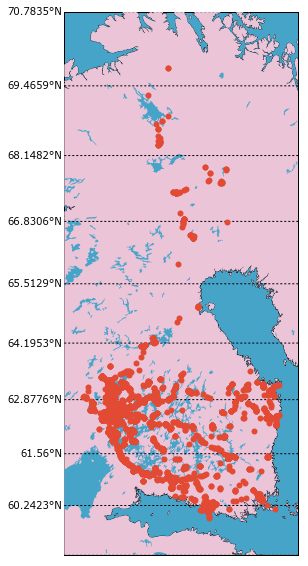

In [62]:
plot_geo(df_geo.lat.values, df_geo.lon.values)

Мы будем использовать расстояние haversine - на входе требуются координаты в **радианах**. Выход тоже будет в радианах. Чтобы перейти от градусов в радианты мы можем вспомнить тригонометрию, а можем воспользоваться функцией `np.radians`.

Для кого, чтобы не терять связь с реальностью, будем иметь ввиду, что расстояние в 1 радиан на земном шаре равно примерно 6371.0088 километрам.

Создайте матрицу X с координатами в радианах

In [63]:
km_in_radian = 6371.0088
X = np.radians(df_geo.values)

In [64]:
X

array([[ 1.09254644,  0.51912899],
       [ 1.09283093,  0.51913073],
       [ 1.09282744,  0.51915866],
       ..., 
       [ 1.09266338,  0.5190679 ],
       [ 1.09256739,  0.5191063 ],
       [ 1.0925447 ,  0.51911502]])

Как же определить, какие параметры для DBSCAN выставлять? Наибольшую проблемы представляет параметр eps.

Будем считать, что MinPts нам дан свыше (например MinPts = 20). Воспользуемся эвристикой, схожей с методом локтя для оценки eps:

* Расчитайте среднее расстояние до k=MinPts ближайших соседей каждой точки (класс `NearestNeighbors` и метод `kneighbors`)
* Отсортируйте полученный массив и выведите его на график
* Выберите такое расстояние, где будет наблюдаться "перегиб"

In [65]:
nn = NearestNeighbors(n_neighbors=21, algorithm='ball_tree', metric='haversine')
nn.fit(X)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='haversine',
         metric_params=None, n_jobs=1, n_neighbors=20, p=2, radius=1.0)

In [66]:
dist, ind = nn.kneighbors(X, n_neighbors=21, return_distance=True)

In [68]:
dist.shape

(13467, 21)

In [77]:
mean_dist = dist[:, 1:].mean(axis=1)

In [78]:
mean_dist = np.sort(mean_dist)

In [79]:
mean_dist = mean_dist

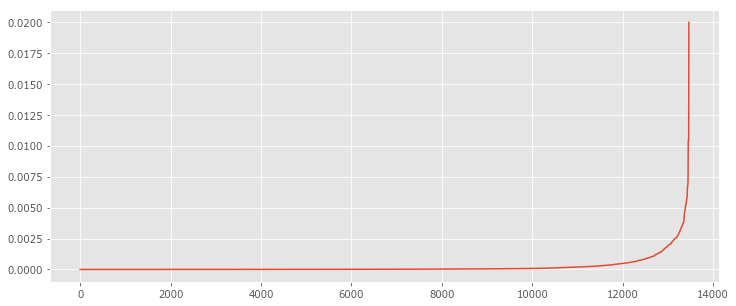

In [80]:
plt.plot(mean_dist)

Определим eps мы можем начать кластеризацию

* Создайте экземпляр класса DBSCAN, кластеризуйте данные
* Выведите полученные метки кластеров и их частоты
* Изобразите координаты точек, не попавших в кластер выбросов (метка -1)

In [86]:
dbscan = DBSCAN(eps=0.0015, min_samples=20, metric='haversine', algorithm='ball_tree')
dbscan.fit(X)


DBSCAN(algorithm='ball_tree', eps=0.0015, leaf_size=30, metric='haversine',
    min_samples=20, n_jobs=1, p=None)

In [87]:
labels = dbscan.labels_

In [88]:
pd.Series(labels).value_counts()

 0     10232
-1       723
 3       312
 11      289
 1       247
 8       222
 2       158
 5       146
 10      133
 12      123
 15       90
 21       64
 19       63
 25       47
 7        46
 13       43
 16       43
 30       37
 20       36
 24       36
 6        35
 14       34
 17       33
 9        31
 23       26
 32       24
 26       24
 27       23
 18       23
 33       22
 4        21
 29       21
 28       20
 22       20
 31       20
dtype: int64

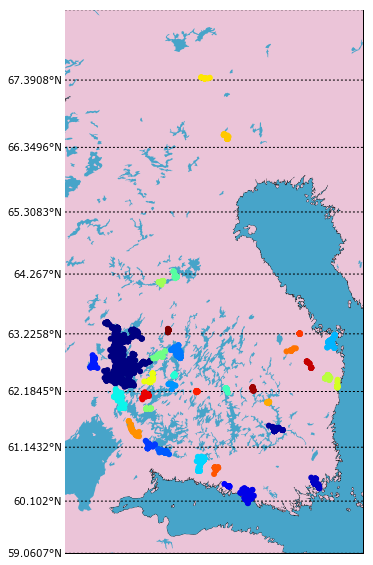

In [93]:
idx = labels != -1
plot_geo(df_geo.loc[idx, 'lat'].values, 
         df_geo.loc[idx, 'lon'].values, 
         labels=labels[idx])

In [ ]:
`